In [1]:
# Dependencies
import pandas as pd
import os
from pprint import pprint
import requests
import json
import sys
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [2]:
#Made edits in excel, pulling back in
clean_hospital= pd.read_csv("Outputs/Finalized_Data.csv")
clean_hospital = clean_hospital.drop(columns=['Unnamed: 0'])
clean_hospital

,Hospital name,City,Hospital County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longitude,Street Address,State,Hospital Zip Code,Full Address,Census Zip Code,Census Latiude,Census Longitude,Census County,Population,Median Income
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,1035 Red Bud Road Northeast,Georgia,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30703.0,34.479066,-84.762161,Gordon County,40820,24110
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,707 Old Dalton Ellijay Road,Georgia,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,Los Angeles County,33460,24457
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,915 Gordon Avenue,Georgia,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31758.0,30.868187,-83.927785,Thomas County,34781,24350
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,903 North Court Street,Georgia,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,Wood County,9062,24644
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,90 East Stephens Street,Georgia,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,Mitchell County,8419,21584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,Zebulon,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30295.0,33.101705,-84.312520,Wake County,4352,31654
538,Emory Johns Creek Hospital,Alpharetta,Fulton County,118,2007,Emory,NaN,ChIJ8wevZy-Z9YgR5mpDmsMDM48,34.066497,-84.176237,6325 Hospital Parkway,Georgia,30097.0,"6325 Hospital Pkwy, Johns Creek, GA 30097, USA",NaN,NaN,NaN,NaN,229248,53503
539,Southeast Georgia Health System Camden,Saint Marys,Camden County,40,NaN,SGHS,NaN,ChIJU6IsZ5cE5YgRaTwbgslwgUw,30.780917,-81.615147,2000 Dan Proctor Drive,Georgia,31558.0,"2000 Dan Proctor Dr, St Marys, GA 31558, USA",NaN,NaN,NaN,NaN,21307,29862
540,WellStar West Georgia Medical Center,Lagrange,Troup County,542,1937,WellStar,NaN,ChIJ40ZJ5vtWi4gRK6PnDb-BAPU,33.030940,-85.058637,1514 Vernon Road,Georgia,30240.0,"1514 Vernon Rd, LaGrange, GA 30240, USA",NaN,NaN,NaN,NaN,79646,23825


In [3]:
hospital_data = clean_hospital[['Hospital name', 'City', 'Acute Care Beds', 'Population']]
hospital_sum = hospital_data.groupby('City').sum()
hospital_sum = hospital_sum.reset_index()
hospital_sum

,City,Acute Care Beds,Population
0,Abbeville,0,4563
1,Acworth,0,99683
2,Adairsville,0,16138
3,Adel,60,10836
4,Adrian,0,3071
...,...,...,...
509,Wrens,0,3065
510,Wrightsville,0,7046
511,Yatesville,0,1656
512,Young Harris,0,5038


In [5]:
hospital_bed = hospital_sum.loc[(hospital_sum['Acute Care Beds'] > 0)]
sorted_hospital_bed = hospital_bed.sort_values(by=['Acute Care Beds'])
top_2_data = sorted_hospital_bed.tail(2)
print(top_2_data)
last_2_data = sorted_hospital_bed.head(2)
print(last_2_data)
final_4_data = top_2_data.append(last_2_data, ignore_index=True)
final_4_data

       City  Acute Care Beds  Population
26  Augusta             1103      817212
24  Atlanta             5124    12848550
           City  Acute Care Beds  Population
302  Monticello               17        9071
78    Cedartown               18       23814


,City,Acute Care Beds,Population
0,Augusta,1103,817212
1,Atlanta,5124,12848550
2,Monticello,17,9071
3,Cedartown,18,23814


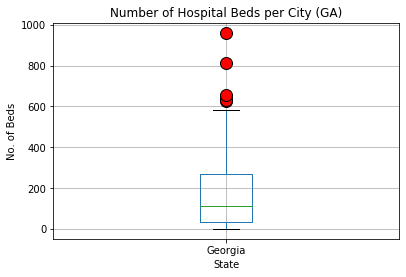

In [6]:
# Generate a box plot of hospital data
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
clean_hospital.boxplot(column=["Acute Care Beds"],by="State",flierprops=orange_out)

plt.title("Number of Hospital Beds per City (GA)")
plt.suptitle("")
plt.ylabel("No. of Beds")
plt.show()

In [10]:
clean_hospital['Acute Care Beds'] = clean_hospital['Acute Care Beds'].replace(to_replace='nan',value="0",regex=True)
clean_hospital["Beds per 1000"] = 1000 * clean_hospital["Population"]/clean_hospital["Acute Care Beds"]
clean_hospital['Beds per 1000'].replace(np.inf, 0, inplace=True)

  
clean_hospital


,Hospital name,City,Hospital County,Acute Care Beds,YearFounded,Affiliation,Notes,Place ID,Hospital Latitude,Hospital Longitude,...,Hospital Zip Code,Full Address,Census Zip Code,Census Latiude,Census Longitude,Census County,Population,Median Income,Beds per 1000 people,Beds per 1000
0,AdventHealth Gordon,Calhoun,Gordon County,69,NaN,AdventHealth,Formerly Gordon Hospital,ChIJfVjpjer9X4gRGK7NwGG_tbg,34.510205,-84.926304,...,30701.0,"1035 Red Bud Rd NE, Calhoun, GA 30701, USA",30703.0,34.479066,-84.762161,Gordon County,40820,24110,591.594203,5.915942e+05
1,AdventHealth Murray,Chatsworth,Murray County,29,NaN,AdventHealth,Formerly Murray Medical Center,ChIJ-U0scjndX4gRG-FoXnNaHI4,34.779956,-84.783038,...,30705.0,"707 Old Dalton Ellijay Rd, Chatsworth, GA 3070...",30705.0,34.753129,-84.775020,Los Angeles County,33460,24457,1153.793103,1.153793e+06
2,Archbold Memorial Hospital,Thomasville,Thomas County,264,1925,Archbold,NaN,ChIJsxblg8q17YgR8XXHSBDuObQ,30.825169,-83.972128,...,31792.0,"915 Gordon Ave, Thomasville, GA 31792, USA",31758.0,30.868187,-83.927785,Thomas County,34781,24350,131.746212,1.317462e+05
3,Archbold - Brooks County Hospital,Quitman,Brooks County,25,NaN,Archbold,NaN,ChIJiyuklBp_7ogRmoGX5XNztMM,30.795039,-83.559146,...,31643.0,"903 N Court St, Quitman, GA 31643, USA",31643.0,30.783639,-83.553430,Wood County,9062,24644,362.480000,3.624800e+05
4,Archbold - Mitchell County Hospital,Camilla,Mitchell County,25,NaN,Archbold,NaN,ChIJswuXyhic7YgRuk38qsPrYt4,31.229773,-84.205317,...,31730.0,"90 E Stephens St, Camilla, GA 31730, USA",31730.0,31.209854,-84.236670,Mitchell County,8419,21584,336.760000,3.367600e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,NaN,Zebulon,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30295.0,33.101705,-84.312520,Wake County,4352,31654,0.000000,0.000000e+00
538,Emory Johns Creek Hospital,Alpharetta,Fulton County,118,2007,Emory,NaN,ChIJ8wevZy-Z9YgR5mpDmsMDM48,34.066497,-84.176237,...,30097.0,"6325 Hospital Pkwy, Johns Creek, GA 30097, USA",NaN,NaN,NaN,NaN,229248,53503,1942.779661,1.942780e+06
539,Southeast Georgia Health System Camden,Saint Marys,Camden County,40,NaN,SGHS,NaN,ChIJU6IsZ5cE5YgRaTwbgslwgUw,30.780917,-81.615147,...,31558.0,"2000 Dan Proctor Dr, St Marys, GA 31558, USA",NaN,NaN,NaN,NaN,21307,29862,532.675000,5.326750e+05
540,WellStar West Georgia Medical Center,Lagrange,Troup County,542,1937,WellStar,NaN,ChIJ40ZJ5vtWi4gRK6PnDb-BAPU,33.030940,-85.058637,...,30240.0,"1514 Vernon Rd, LaGrange, GA 30240, USA",NaN,NaN,NaN,NaN,79646,23825,146.948339,1.469483e+05


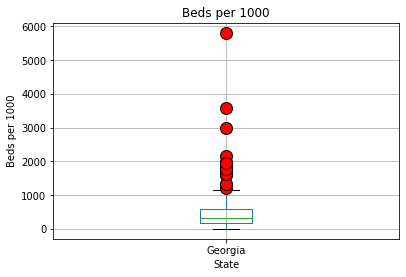

In [12]:
# Generate a box plot of beds per 1000 people
orange_out = dict(markerfacecolor='red',markersize=12)

#Make Box Plot
clean_hospital.boxplot(column=["Beds per 1000 people"],by="State",flierprops=orange_out)

plt.title("Beds per 1000")
plt.suptitle("")
plt.ylabel("Beds per 1000")
plt.show()

The mean of Hospital Beds is: 41.83
The standard deviation of Hospital Beds is: 121.37


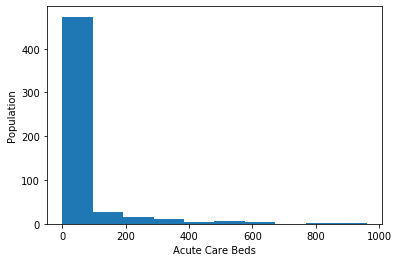

In [9]:
Acute_Care_Beds = clean_hospital["Acute Care Beds"]
print(f"The mean of Hospital Beds is: {round(Acute_Care_Beds.mean(),2)}")
print(f"The standard deviation of Hospital Beds is: {round(Acute_Care_Beds.std(),2)}")
plt.hist(clean_hospital["Acute Care Beds"])
plt.xlabel("Acute Care Beds")
plt.ylabel("Population")
plt.savefig("Charts\Histogram")
plt.show()